### YADDA AKE  HADA NEURAL NETWORK 
                    Ady_Techy

### 1 Muyi installing Libraries da muke bukata da code dinnan na kasa, idan kanada su ba sai kayi running dinsa ba

In [ ]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib
!pip install pillow

### 2. Muyi importing Libraries dda Modules da muke mukata

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import datasets
from keras.utils import to_categorical

### 3, Mu shigo da data set din da muyi aiki dashi daga tensorflow.keras sannan mu duba training data

In [3]:
from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print("{} Datar Training {} da datar test\n".format(len(x_train), len(x_test)))
print("shape din hotunan mu na training:", x_train.shape)
print("shape din sunayen ko wanne hoto:", y_train.shape)

50000 Datar Training 10000 da datar test

shape din hotunan mu na training: (50000, 32, 32, 3)
shape din sunayen ko wanne hoto: (50000, 1)


### 4. Mu duba test data dinmu

In [4]:
print("shape din hotunan mu na gwaji(Test):", x_test.shape)
print("shape din sunayen ko wanne hoto na gwaji(Test):", y_test.shape)

shape din hotunan mu na gwaji(Test): (10000, 32, 32, 3)
shape din sunayen ko wanne hoto na gwaji(Test): (10000, 1)


#### 5. Mu bawa Kowanne sashe(category) sunansa yayi daidai da lambarsa

In [5]:
class_names = {
    0: 'jirgin sama',
    1: 'Mota',
    2: 'tsuntsu',
    3: 'mage',
    4: 'barewa',
    5: 'kare',
    6: 'kwado',
    7: 'doki',
    8: 'jirgin ruwa',
    9: 'babbar mota',
}

### 6. Mu duba hotuna guda tara daga ciki tare da label dinsu

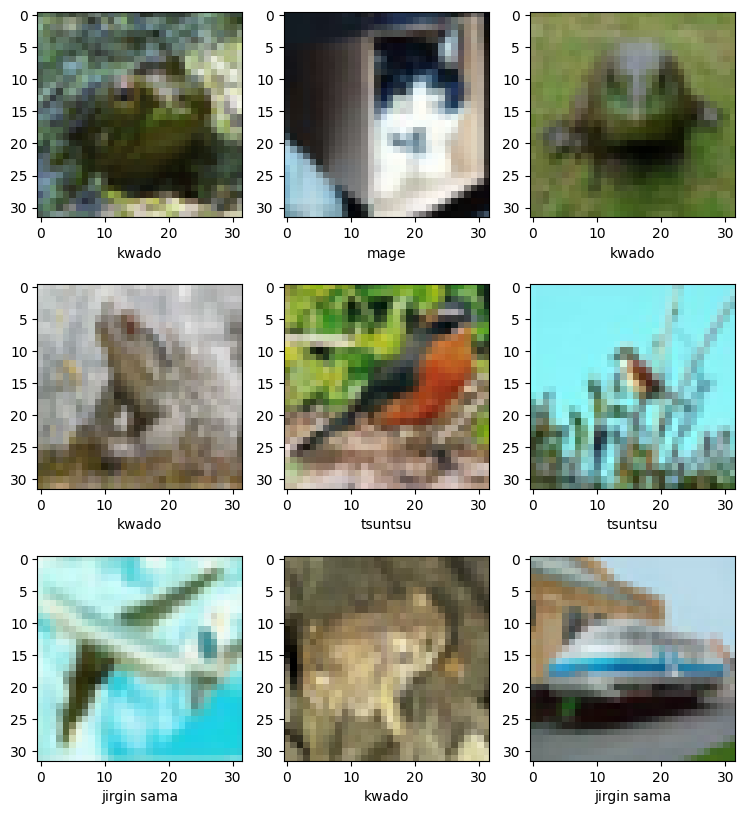

In [6]:
idx = np.random.randint(len(x_train) - 9)

plt.figure(figsize=(9,10))
for i in range(9):
    # zana kowanne sample
    plt.subplot(3, 3, i+1)   
    plt.imshow(x_train[i + idx]) 
    plt.xlabel(class_names[(y_train[i + idx][0])])

# nuna sakamako
plt.show()

### 7. Kala ana lissafata ne data 0 zuwa 255 dan haka kowanne array zamu iya samun lamba daga 0 zuwa 255 wannan ze iya sakawa computer dinmu tayi nauyi dan haka zamu iya raba kowanne array da 255 dan mu samu iyakar lamba daga 0 zuwa 1

In [7]:
# [sample na farko], [dkalar farko], [layi na farko a jikin pixel]
print(x_train[0][0][0])

[59 62 63]


#### yanzu mu rage su mu gani

In [8]:
x_train = x_train / 255.
x_test = x_test / 255.
print(x_train[0][0][0])

[0.23137255 0.24313725 0.24705882]


### 8. Yanzu zamuyi abinda ake kira one hot enchoding domin bawa neural network dinmu damar rarraba sashe (category)

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print("wannan {} yana nufin {}".format(y_train[0], class_names[np.argmax(y_train[0])]))

wannan [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] yana nufin kwado


### 9. Mu hada Model dinmu 

In [11]:
from tensorflow.keras import Sequential, layers

def build_model():
    model = Sequential()
    # 32 output units, 3 filter size
    model.add(layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2,2))) 
    # 32 output units, 5 filter size
    model.add(layers.Conv2D(32, 5, activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))  
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))
    model.add(layers.Softmax())
    
    model.compile(
        optimizer ='adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'])
    return model

# hada model
model = build_model()

# mu duba bayanin model
model.summary()

c:\Users\hp\anaconda3\envs\RAG\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,314 (618.41 KB)

 Trainable params: 158,314 (618.41 KB)

 Non-trainable params: 0 (0.00 B)

### 10. Muyi taining Model dinmu

In [12]:
%%time
history = model.fit(x_train, y_train, epochs=10) #epoch shine ko sau nawa kakeso model din yabi kan din
model.save('C:/Users/hp/Downloads/baseline_ady.keras') # ka chanja ka saka path din computer dinka

print("\naccuracy na fari: {} | sabon accuracy: {}".format(history.history["accuracy"][0], history.history["accuracy"][-1]))
print("loss na fari: {} | sabon loss: {}".format(history.history["loss"][0], history.history["loss"][-1]))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.3909 - loss: 1.6646
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.6096 - loss: 1.1152
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6664 - loss: 0.9567
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.7003 - loss: 0.8576
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7281 - loss: 0.7838
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7453 - loss: 0.7243
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7629 - loss: 0.6801
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7754 - loss: 0.6446
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7908 - loss: 0.5975
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.8075 - loss: 0.5595

accuracy na fari: 0.4798800051212311 | sabon accuracy: 0.7988600134849548
loss na fari: 1.44536936

### 11. Mu duba yayin loss da accuracy dinmu a graph akan kowanne epoch

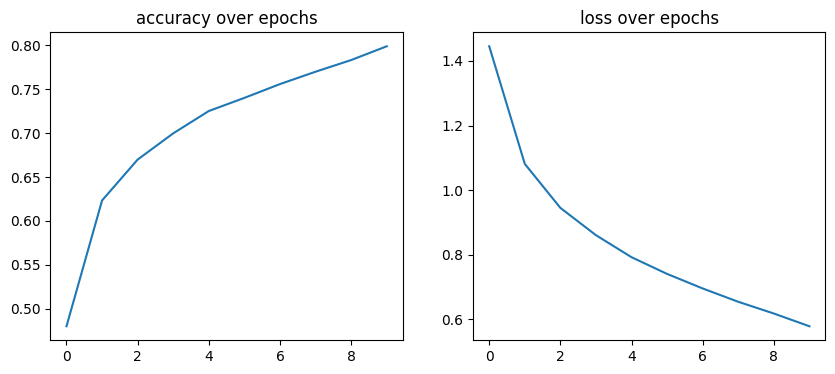

In [13]:
fig, axis = plt.subplots(1, 2, figsize=(10,4))  
axis[0].plot(history.history["accuracy"])
axis[0].set_title("accuracy over epochs")
axis[1].plot(history.history["loss"])
axis[1].set_title("loss over epochs")
plt.show()

### 12. Muyi amfani da test data dinmu mu auna accuracy din neural network dinmu

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\ntest accuracy score:', test_acc)

313/313 - 3s - 9ms/step - accuracy: 0.6979 - loss: 0.9302

test accuracy score: 0.6978999972343445


### 13. Muyi hasashe(prediction) na test data dinmu muga yadda zeyi

In [15]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


### 14. Mu duba wasu daga cikin hotunan dake test data muga karfin network dinmu

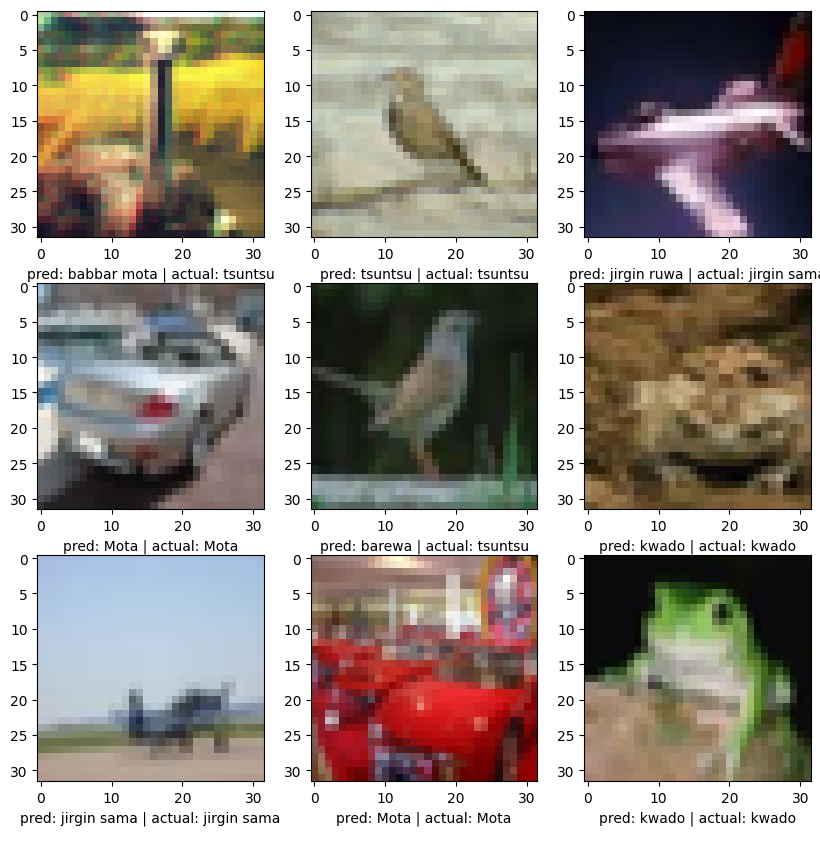

In [16]:
# zamu zabi guda tara a random
idx = np.random.randint(len(x_test) - 9)

plt.figure(figsize=(10,10))
for i in range(9):
    # a zana kowanne da hasashensa
    plt.subplot(3, 3, i+1)   
    plt.imshow(x_test[i + idx]) 
    plt.xlabel("pred: {} | actual: {}\n".format(class_names[np.argmax(predictions[i + idx])], class_names[np.argmax(y_test[i + idx])]))

# nuna result din
plt.show()